# Can we predict final math grades using student's characteristics? 

## Introduction


The data set we have decided to use is the Student Performance data set, specifically the data collected for the subject of mathematics. This data set was collected from two secondary schools in Portugal in 2014 using school reports and questionnaires filled out by students. 

The data reflects the performance of students in Mathematics and Portuguese language which are both modelled under binary/five-level classification and regression tasks. In the original dataset, there were 32 variables given, out of those 32 we only chose to focus on 11 of the variables. 

The variables we chose to take a closer look at are school, sex, school support, paid tutoring, internet access at home, age, absences, number of past class failures, final grade, weekly study time, and health. 

To build our model, we will specifically use the variables of age, absences, failures, and final grade (G3) which are all numeric. Grades are on a scale of 1-20. With 20 being the highest grade. Additionally, we will do analysis on all 11 of our selected variables, including the ones that were not selected to be used in the models.

Studytime is measured in hours studied per week, students who studied for less than 2 hours per week were assigned a studytime value of 1, between 2-5 hours is 2, 5-10 hours is 3, and over 10 hours is 4. Health is on a scale from 1-5, 1 being very bad and 5 being very good. 

Using this data set, we hope to answer the question “Can we predict final math grades using student's characteristics?”.



## Methods

We decided to do **both** a regression model and a classification model to have a better understanding of the data as well as to determine the accuracy of our results. If we were to just do a regression model, we wouldn't have a idea of how *well* our model was performing as we would only have the RMSPE as a metric of performance. 


### Method 1: Regression Model

#### Reading the data

For our analysis, we first started by downloading the dataset from the website. Then we loaded the student math data set into Jupyter. We read the data using read_csv2 and assigned it to `student`.

In [2]:
library(tidyverse)
library(tidymodels)
set.seed(6969)
options(repr.matrix.max.rows = 6)
student <- read_csv2("https://raw.githubusercontent.com/kx-chen/dsci-contract/master/student-mat.csv")
student

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,21,R,GT3,T,1,1,other,other,⋯,5,5,3,3,3,3,3,10,8,7
MS,M,18,R,LE3,T,3,2,services,other,⋯,4,4,1,3,4,5,0,11,12,10
MS,M,19,U,LE3,T,1,1,other,at_home,⋯,3,2,3,3,3,5,5,8,9,9


#### Cleaning the Data

We proceeded to clean the data by selecting only the variables we wanted, which are school, sex, age, paid (paid tutoring), schoolsup (extra educational support), internet (internet access at home), studytime (how long they studied for per week), failures (number of past class failures), health (current health status, ranked from 1-5), absences, and G3.

In [3]:
student_clean <- student %>% select(school, sex, age, paid, schoolsup, internet, studytime, failures, health, absences, G3)
student_clean

school,sex,age,paid,schoolsup,internet,studytime,failures,health,absences,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,no,yes,no,2,0,3,6,6
GP,F,17,no,no,yes,2,0,3,4,6
GP,F,15,yes,yes,yes,2,3,3,10,10
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,21,no,no,no,1,3,3,3,7
MS,M,18,no,no,yes,1,0,5,0,10
MS,M,19,no,no,yes,1,0,5,5,9


#### Setting up

For the both models, we split the clean data into a training and testing set using an 80/20 split with the target variable being G3 as that is the final score we are aiming to predict.

In [4]:
student_split <- initial_split(student_clean, props = 0.80, strata = G3)
student_train <- training(student_split)
student_test <- testing(student_split)

student_split
student_train
student_test

<Analysis/Assess/Total>
<298/97/395>

school,sex,age,paid,schoolsup,internet,studytime,failures,health,absences,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,17,no,no,yes,2,0,3,4,6
GP,F,15,yes,yes,yes,2,3,3,10,10
GP,F,15,yes,no,yes,3,0,5,2,15
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,21,no,no,no,1,3,3,3,7
MS,M,18,no,no,yes,1,0,5,0,10
MS,M,19,no,no,yes,1,0,5,5,9


school,sex,age,paid,schoolsup,internet,studytime,failures,health,absences,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,no,yes,no,2,0,3,6,6
GP,F,16,yes,no,no,2,0,5,4,10
GP,M,16,no,no,yes,2,0,3,0,11
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,F,18,no,no,no,2,0,5,0,13
MS,F,18,no,no,yes,2,0,3,0,10
MS,F,17,no,no,no,2,0,3,0,12


#### Setting up recipe and model

We then created a recipe using the training data and the variables with numerical values, which are age, absences, failures, health, and study time. We also pre proccessed the data by scaling and centering all predictors.

Then, we used a K-nearest neighbors regression model to predict a numerical grade for the student using the age, absences, and failures variables. 


In [5]:
student_recipe <- recipe(G3 ~ age + absences + failures, data = student_train) %>% step_scale(all_predictors()) %>% step_center(all_predictors())

student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% set_engine("kknn") %>% set_mode("regression")

student_recipe
student_spec

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


#### Tuning/Finding ideal K

Without data size, we believed there would be enough data that a 5-fold cross-validation will be sufficient to help us determine the minimum RMSPE and therefore the best K value (21).

In [6]:
gridvals <- tibble(neighbors = seq(1, 200))
student_vfold <- vfold_cv(student_train, v = 5, strata = G3)

student_k <- workflow() %>% add_recipe(student_recipe) %>% add_model(student_spec) %>%
             tune_grid(student_vfold, grid = gridvals) %>% collect_metrics() %>% filter(.metric == "rmse") %>% filter(mean == min(mean)) %>% pull(neighbors)

student_k

[1] 13

#### Evaluating on the test set

Then, using the ideal K value, 21, we made predictions on our test dataset and got our RMSPE for the predictions.

In [7]:
student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = student_k) %>%
  set_engine("kknn") %>%
  set_mode("regression")

student_fit <- workflow() %>%
  add_recipe(student_recipe) %>%
  add_model(student_spec) %>%
  fit(data = student_train)

predictions <- student_fit %>%
  predict(student_test) %>%
  bind_cols(student_test)

student_metrics <- metrics(predictions, truth = G3, estimate = .pred)
student_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.6371441
rsq,standard,0.3147689
mae,standard,2.8469469


As can be seen from above, our model has a RMSPE of approximately 3.63. This proves that it is possible to predict student's math grades using their characteristics, but it doesn't tell us much about the accuracy of quality of our predictions.

To solve this problem, we decided to take a second attempt at making a model, but this time we used a K-nearest neighbor classification model instead, classifying the student's grades into "Low", "Medium", and "High". 

### Method 2: Classification Model

Because our regression model can only be measured by RMSPE, we decided to also create a K-NN classification model for our grades as well. This way, we could get a specific accuracy for how well our model performed. With a better metric (accuracy) we can then come to a better conclusion for our predictive question: "Can we predict math grades using student's characteristics?".

#### Preparing data for classification

For the classification model, we decided to turn G3 data into categorical data by dividing the grades into 3 categories, low, medium and high. Low represents a mark from 0-5, medium represents a mark from 5-10, and high represents a mark from 10-20.

We then split the data into training and testing sets using an 80/20 split with the target variable being the G3 category, which is the G3 data that has been categorized. 

In [8]:
set.seed(6969)
b <- c(-Inf, 5, 10, Inf)

names <- c("Low", "Medium", "High")

# Categorize students by the labels above
student_clean$G3category <- cut(student_clean$G3, breaks = b, labels = names)

student_clean

student_split <- initial_split(student_clean, props = 0.80, strata = G3category)
student_train <- training(student_split)
student_test <- testing(student_split)

school,sex,age,paid,schoolsup,internet,studytime,failures,health,absences,G3,G3category
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
GP,F,18,no,yes,no,2,0,3,6,6,Medium
GP,F,17,no,no,yes,2,0,3,4,6,Medium
GP,F,15,yes,yes,yes,2,3,3,10,10,Medium
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MS,M,21,no,no,no,1,3,3,3,7,Medium
MS,M,18,no,no,yes,1,0,5,0,10,Medium
MS,M,19,no,no,yes,1,0,5,5,9,Medium


#### Setup recipe and models for tuning

After splitting the data, we then created a recipe using the training data and the variables age, absences, and failures. However, this time, we set the mode to classification. Additionally, we decided to do use a 10 fold cross-validation to determine the best K value. 

In [9]:
# Setup cross validation
student_vfold <- vfold_cv(student_clean, v = 10, strata = G3category)

# Setup recipe
student_recipe <- recipe(G3category ~ age + absences + failures, data = student_train) %>%
                    step_scale(all_predictors()) %>% step_center(all_predictors())

# Setup classification model
student_classification_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% set_engine("kknn") %>% set_mode("classification")

#### Finding the ideal K value

We plotted the K-nearest neighbour values against accuracy estimates to determine the most accurate K values to use, which is k = 14. 

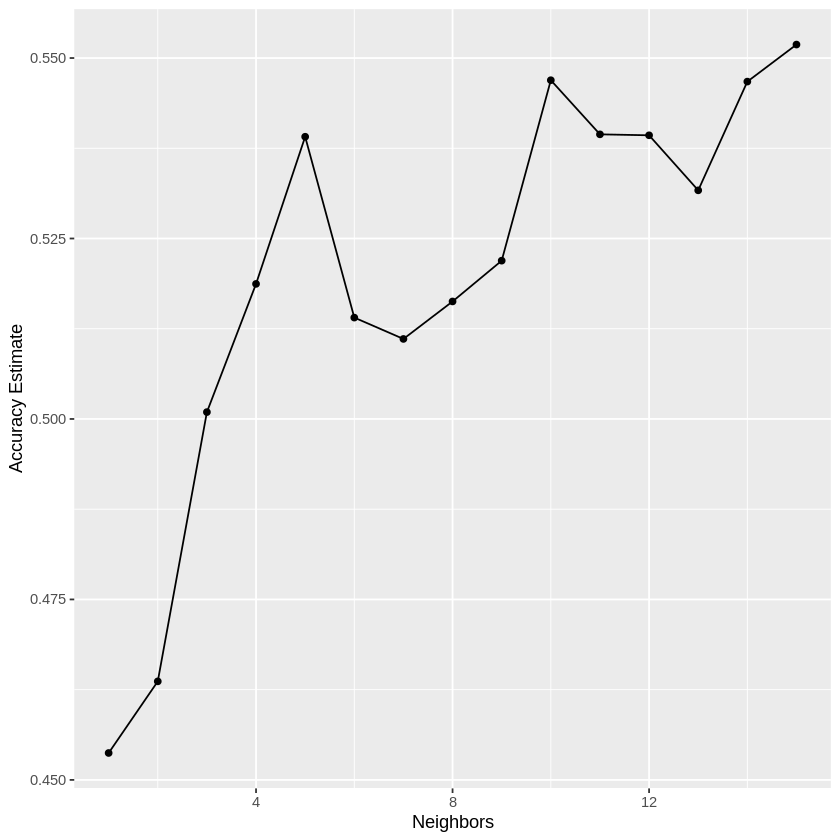

In [10]:
# Try 20 values of K, find best one
student_classification_results <- workflow() %>%
  add_recipe(student_recipe) %>%
  add_model(student_classification_spec) %>%
  tune_grid(resamples = student_vfold, grid = 20) %>%
  collect_metrics()

# Filter for accuracy
accuracies <- student_classification_results %>%
  filter(.metric == "accuracy")

# Graph the accuracy vs. K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")
accuracy_vs_k

Figure 1: Predicted accuracy of model compared to Neighbors used for prediction.

#### Finding the accuracy 

From the graph above, we can see that a K value of 14 yields the best results. Using the newly found K value, we attempted to find its accuracy by K-nearest neighbours classification. 

Then using a workflow function, we created a workflow to create predictions. 
Then we predicted using our new workflow on our test dataset. 

Finally, we called `metrics` on the results of our predictions to determine the accuracy of our model (how often it determined the correct value, `G3category`, compared to the predicted column, `.pred_class`.)

We found our finally model yieled a accuracy of approximately 57%.

In [11]:
student_classification_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) %>% set_engine("kknn") %>% set_mode("classification")

student_fit <- workflow() %>%
  add_recipe(student_recipe) %>%
  add_model(student_classification_spec) %>%
  fit(data = student_train)
student_fit


student_predictions <- predict(student_fit, student_test) %>%
  bind_cols(student_test) %>% metrics(truth = G3category, estimate = .pred_class)
student_predictions


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~14, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4747475
Best kernel: rectangular
Best k: 14

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5714286
kap,multiclass,0.2017067


## Results

### Final Visualization Model of the Analysis

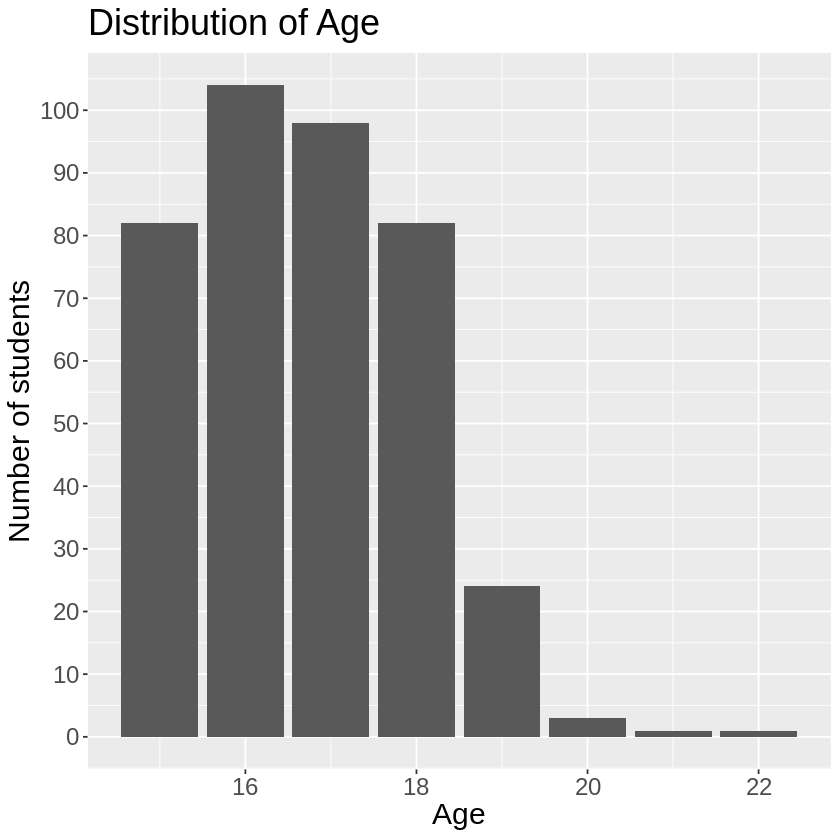

In [12]:
student_preds <- student_fit %>% predict(student_train) %>% bind_cols(student_train)

age_15 <- student_clean %>% filter(age==15)
age_15_G3 <- summarize(age_15 , avgG3_15 = sum(G3) / (age_15 %>% nrow()))
age_16 <- student_clean %>% filter(age==16) 
age_16_G3 <- summarize(age_16 , avgG3_16=sum(G3) / (age_16 %>% nrow()))
age_17 <- student_clean %>% filter(age==17) 
age_17_G3 <- summarize(age_17 , avgG3_17=sum(G3) / (age_17 %>% nrow())) 
age_18 <- student_clean %>% filter(age==18) 
age_18_G3 <- summarize(age_18 , avgG3_18=sum(G3) / (age_18 %>% nrow())) 
age_19 <- student_clean %>% filter(age==19) 
age_19_G3 <- summarize(age_19 , avgG3_19=sum(G3) / (age_19 %>% nrow())) 
age_20 <- student_clean %>% filter(age==20) 
age_20_G3 <- summarize(age_20 , avgG3_20=sum(G3) / (age_20 %>% nrow())) 
age_21 <- student_clean %>% filter(age==21) 
age_21_G3 <- summarize(age_21 , avgG3_21=sum(G3) / (age_21 %>% nrow())) 
age_22 <- student_clean %>% filter(age==22) 
age_22_G3 <- summarize(age_22 , avgG3_22=sum(G3) / (age_22 %>% nrow())) 

age_avgG3 <- tibble(Age = 15:22 , Avg_final_grade = c(age_15_G3,age_16_G3,age_17_G3,age_18_G3,age_19_G3,age_20_G3,age_21_G3,age_22_G3) )

age_dist <- ggplot(student , aes(x=age)) + geom_bar() + labs(x= "Age" , y="Number of students" , title="Distribution of Age") + 
theme(text=element_text(size=18)) + scale_y_continuous(breaks = scales::pretty_breaks(n = 10))

age_dist





Figure 2: Distribution of grades for all students

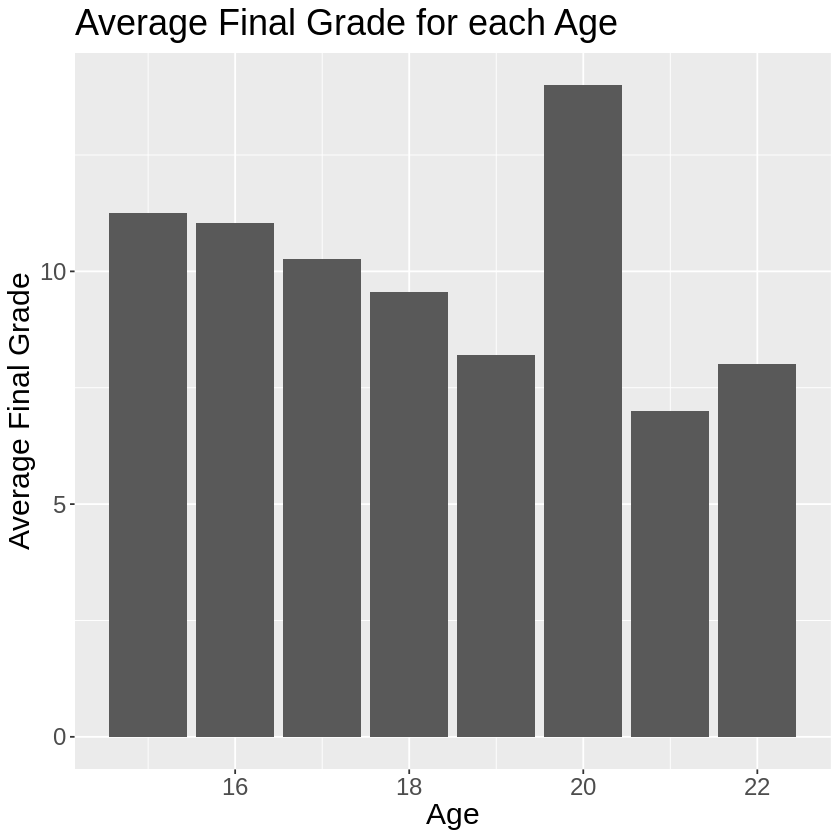

In [13]:
plot <- ggplot(age_avgG3 , aes(x=Age , y=Avg_final_grade)) + geom_bar(stat="identity") + 
        labs(x="Age" , y="Average Final Grade" , title="Average Final Grade for each Age") + theme(text=element_text(size=18))

plot 

Figure 3: Average final grade for each age

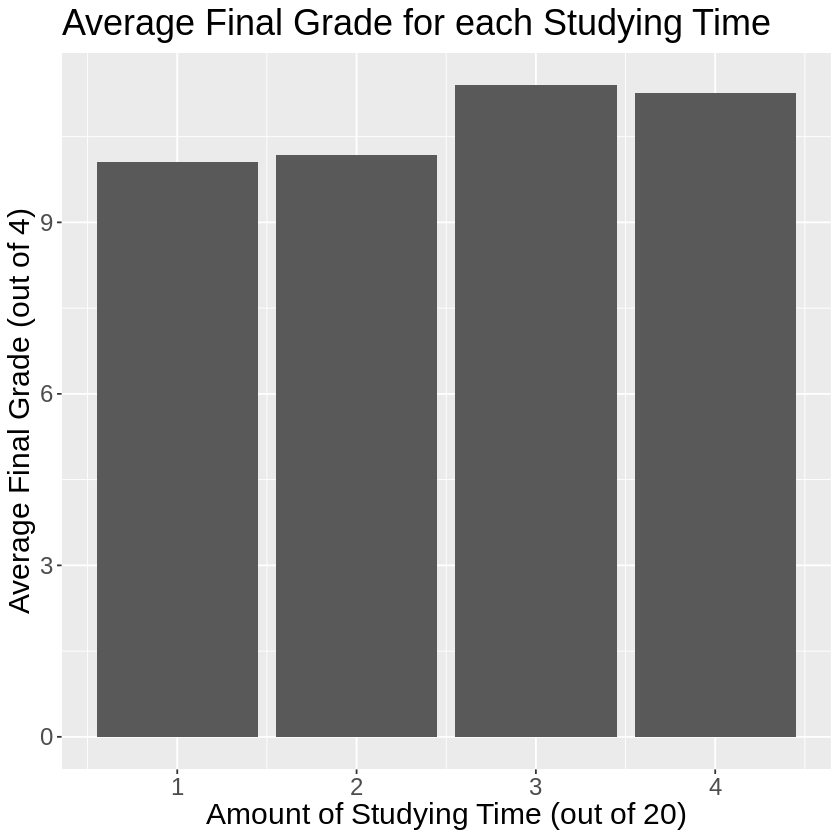

In [14]:
time1 <- student_clean %>% filter(studytime == 1) 
time1_avgG3 <- summarize(time1 , avgG3_time1 = sum(G3) / (time1 %>% nrow()))
time2 <- student_clean %>% filter(studytime == 2) 
time2_avgG3 <- summarize(time2 , avgG3_time2 = sum(G3) / (time2 %>% nrow()))
time3 <- student_clean %>% filter(studytime == 3) 
time3_avgG3 <- summarize(time3 , avgG3_time3 = sum(G3) / (time3 %>% nrow()))
time4 <- student_clean %>% filter(studytime == 4) 
time4_avgG3 <- summarize(time4 , avgG3_time4 = sum(G3) / (time4 %>% nrow()))

studytime_avgG3 <- tibble(time = 1:4 , Avg_final_grade = c(time1_avgG3,time2_avgG3,time3_avgG3,time4_avgG3) )

studytime_plot <- ggplot(studytime_avgG3 , aes(x=time , y=Avg_final_grade)) + geom_bar(stat="identity") + labs(x="Amount of Studying Time (out of 20)" , y="Average Final Grade (out of 4)" ,title="Average Final Grade for each Studying Time") +
theme(text=element_text(size=18))

studytime_plot

Figure 4: Average final grade for the amount of time studied 

Paid,Avg_final_grade
<chr>,<named list>
Yes,10.92265
No,9.985981


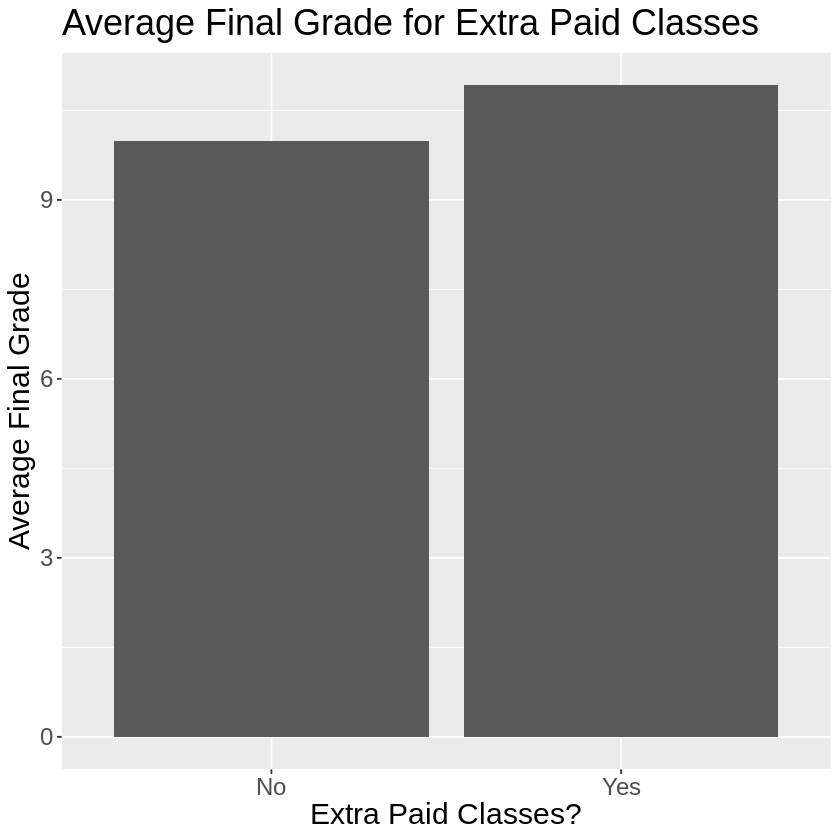

In [15]:
paid <- student_clean %>% filter(paid == "yes") 
paid_avgG3 <- summarize(paid , avgG3_paid = sum(G3)) / (paid %>% nrow())

no_paid <- student_clean %>% filter(paid == "no")
no_paid_avgG3 <- summarize(no_paid , avgG3_no_paid = sum(G3)) / (no_paid %>% nrow())

paid_avgG3 <- tibble(Paid = c("Yes" , "No"), Avg_final_grade = c(paid_avgG3, no_paid_avgG3))
paid_avgG3

paid_plot <- ggplot(paid_avgG3 , aes(x=Paid , y=Avg_final_grade)) + geom_bar(stat="identity") + labs(x="Extra Paid Classes?" , y="Average Final Grade" ,title="Average Final Grade for Extra Paid Classes") +
theme(text=element_text(size=18))

paid_plot

Figure 5: Average final grade for students with and without extra paid classes

#### Visualizations Relevant to Exploratory Data Analysis

To explore the data related to the planned analysis, we decided to take a look at the distribution of different characteristics (Studytime, health, absences, and failures) using bar graphs. This format allows us to **count** the number of students who share that attribute, and this count can be used to visualize a distribution.    

The graph below describes the distribution of the number of students that study a certain amount of time. For additional context, a studytime value of 1 represents less than 2 hours of studying, a studytime value of 2 represents 2 to 5 hours, a studytime value of 3 represents 5 to 10 hours, and a studytime value of 4 represents more than 10 hours of study time.

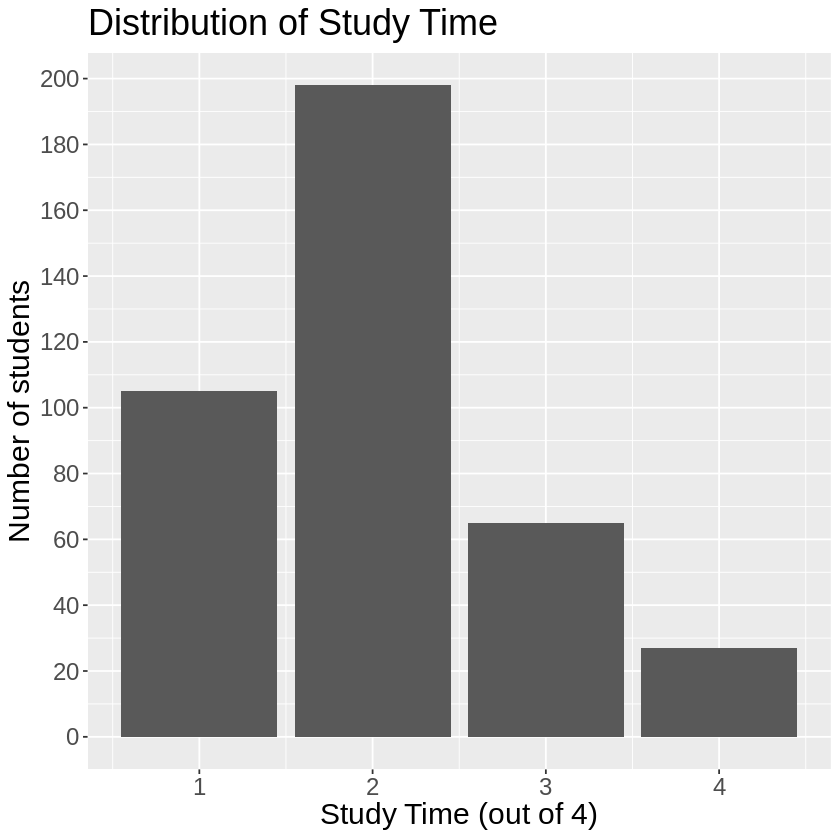

In [16]:
studytime_dist <- ggplot(student , aes(x=studytime)) + geom_bar() + labs(x= "Study Time (out of 4)" , y="Number of students" , title="Distribution of Study Time") + 
theme(text=element_text(size=18)) + scale_y_continuous(breaks = scales::pretty_breaks(n = 10))
 

studytime_dist

Figure 6: Distribution of study time for all students

The graph below describes the distribution of the number of students and their health. For additional context, a health value of 1 is very bad, and a health value of 5 is very good.

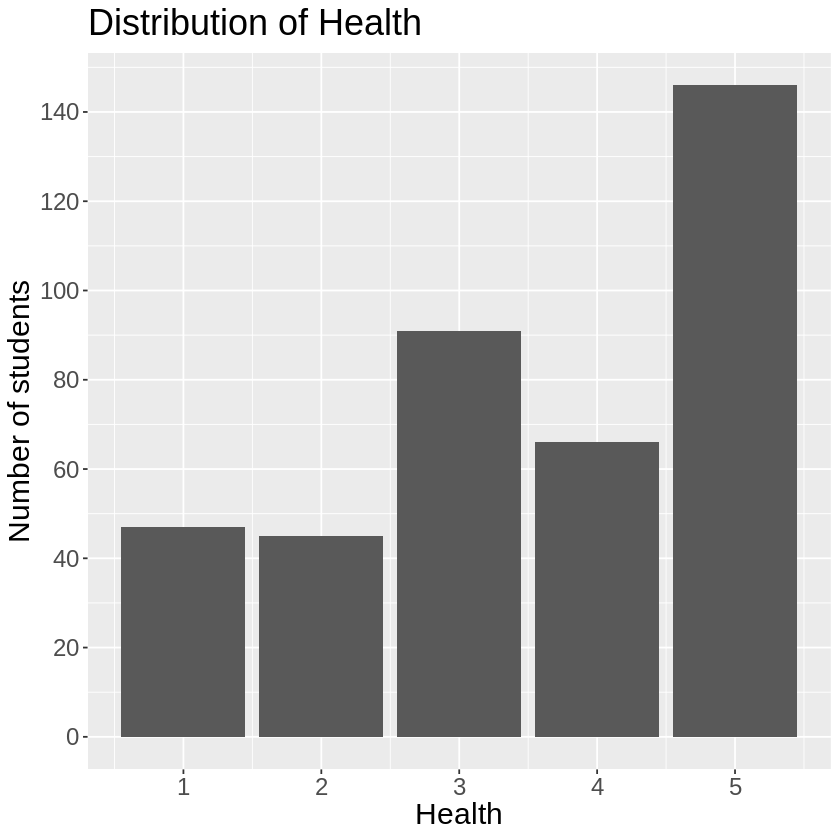

In [17]:
health_dist <- ggplot(student , aes(x=health)) + geom_bar() + labs(x= "Health" , y="Number of students" , title="Distribution of Health") + 
theme(text=element_text(size=18)) + scale_y_continuous(breaks = scales::pretty_breaks(n = 10))

health_dist

Figure 7: Distribution of health (out of 4) among all students

The graph below describes the distribution of the number of students and the number of absences they have, ranging from 0 to 93.

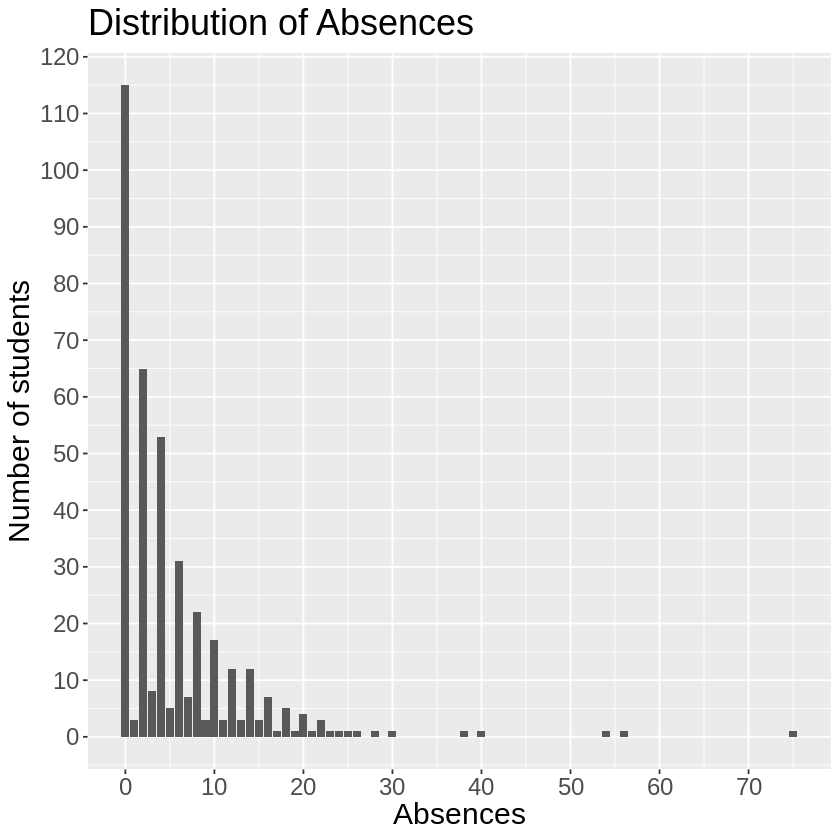

In [18]:
absences_dist <- ggplot(student , aes(x=absences)) + geom_bar() + labs(x= "Absences" , y="Number of students" , title="Distribution of Absences") + 
theme(text=element_text(size=18)) + scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + scale_y_continuous(breaks = scales::pretty_breaks(n = 10))

absences_dist

Figure 8: Distribution of absences among students

The graph below shows the distribution of the number of students and the number of past class failures, ranging from 0 to 3.

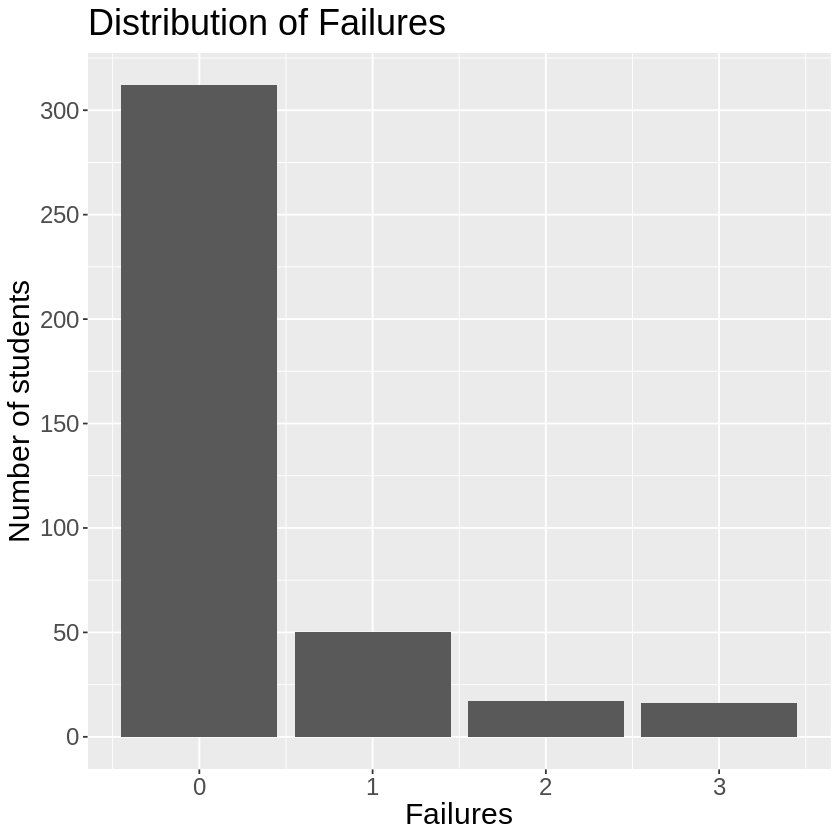

In [19]:
failures_dist <- ggplot(student , aes(x=failures)) + geom_bar() + labs(x= "Failures" , y="Number of students" , title="Distribution of Failures") + 
theme(text=element_text(size=18)) + scale_y_continuous(breaks = scales::pretty_breaks(n = 10))

failures_dist

Figure 9: Distribution of failures among students

## Discussion

### Summary of findings

According to our regression model, there is a correlation between the variables of age, weekly study time and extra paid classes, and final math grades. There is a slight negative correlation between age and the average final math grades with age 20 being an outlier. This can be explained by the smaller population from ages 19-22 making the model not as representative as the other age groups. 

There is a slight positive correlation between weekly study time and average final grades however, the marks drop slightly at number 4 which represents a weekly study time of over 10 hours a week. 

This outcome is not surprising since the length of study time does not correlate to effective studying. Our results for extra paid classes show a positive correlation between having extra paid classes and final math grades. 

This is supported by research from Xu et. al 2014 which was a study on peer tutoring among undergraduate students and their final exam scores in mathematics. The results showed a positive relationship to math placement level and peer tutoring showing that additional support no matter the kind will help increase students’ grades. 

Unfortunately, according to our classification model, the accuracy is only 57.14%. As a result, the relationships we found with the regression model are not as accurate as we had hope and we are unable to use the data to predict Portuguese student grades based on their attributes. 

### Discuss whether this is what you expected to find?

Our classification model shows that the accuracy is only 57% which means that our findings have little to no impact. As a result, we are unable to use the data to predict student grades based on student characteristics. 

Our results show that it is not plausible to use students’ characteristics and study habits to accurately predict their performance using K-nearest neighbour classification. However, there have been other studies similar to ours which used different forms of classification to predict student performance according to other attributes. 

A study conducted by Altabrawee and Qaisar in 2019 used 20 attributes in total but were similar to the attributes we chose to focus on, such as various study habits of students. They used four different classification models in total, logistic regression, Naïve Bayes, artificial neural networks, and decision tree. Logistic regression yielded an accuracy of 74.53%, Naïve Bayes resulted in a 66.51% accuracy, decision tree had an accuracy of 76.93% and Artificial Neural Networks had an accuracy of 77.04%. All of which higher than the accuracy we found with our model. This leads us to pose some questions of our own as the study does indeed show that there is some correlation between the attributes and final grades. 


### Discuss what impact could such findings have?

With the knowledge that other studies have arrived at higher accuracies, it begs the question of how we could improve our model or data to increase our accuracy. One of the flaws we noticed in our data was that most of the numerical data were changed into categorical data which made it more difficult to determine a relationship between the attributes. Perhaps if we used the raw data, we could have created more accurate models with stronger correlations. 
If we are unable to increase the accuracy, it begs the question of if there are other ways to predict student future grades. 


## References

Altabrawee, H., Ali, O. & Qaisar, S. (2019). Predicting students’ performance using machine learning techniques. *Journal of University of Babylon for pure and applied sciences*, 27(1), 194-205. http://doi:10.29196/jubpas.v27i1.2108. 

Cortez, P., & Silva, A. M. G. (2008). *Using data mining to predict secondary school student performance* (FUBUTEC 2008) [Data set].  In A. Brito, & J. Teixeira (Eds.), Proceedings of 5th Annual Future Business Technology Conference, Porto, 5-12. http://www3.dsi.uminho.pt/pcortez/student.pdf.

Xu, Y., Hartman, S., Uribe, G. & Mencke, R. (2014). The effects of peer tutoring on undergraduate students' final examination scores in mathematics. *Journal of College Reading and Learning*, 32(1), 22-13. https://doi.org/10.1080/10790195.2001.10850123.